In [139]:
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns

import re
import os

matplotlib.rcParams['figure.figsize'] = (10, 10)

from pyspark.sql import SparkSession


In [140]:
file = '/home/hduser/Downloads/Youtube/USvideos.csv'

In [141]:
files = [i for i in glob.glob('/home/hduser/Downloads/Youtube/*.{}'.format('csv'))]
sorted(files)

['/home/hduser/Downloads/Youtube/CAvideos.csv',
 '/home/hduser/Downloads/Youtube/DEvideos.csv',
 '/home/hduser/Downloads/Youtube/FRvideos.csv',
 '/home/hduser/Downloads/Youtube/GBvideos.csv',
 '/home/hduser/Downloads/Youtube/USvideos.csv']

In [142]:
df = pd.read_csv(file, index_col='video_id')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 15 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(7)
memory usage: 4.2+ MB


In [144]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [145]:
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [146]:
# formatting both publish date and trending date in correct format

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head(5)

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [148]:
#seperate dates and time into two columns
df.insert(4,'publish_date', df['publish_time'].dt.date)

In [149]:
df['publish_time'] = df['publish_time'].dt.time

In [150]:
df[['publish_date','publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17:13:01
1ZAPwfrtAFY,2017-11-13,07:30:00
5qpjK5DgCt4,2017-11-12,19:05:24
puqaWrEC7tY,2017-11-13,11:00:04
d380meD0W0M,2017-11-12,18:01:41


In [151]:
type_integer = ['views', 'likes', 'dislikes', 'comment_count']

In [152]:
for column in type_integer:
    df[column] = df[column].astype(int)

In [153]:
type_string = ['category_id']

In [154]:
for column in type_string:
    df[column] = df[column].astype(str)

In [155]:
#processing category id using json file uploaded from pc

id_category = {}

with open('/home/hduser/Downloads/US_category_id.json', 'r') as c:
    data = json.load(c)
    for category in data['items']:
        id_category[category['id']] = category['snippet']['title']

In [156]:
id_category

{u'1': u'Film & Animation',
 u'10': u'Music',
 u'15': u'Pets & Animals',
 u'17': u'Sports',
 u'18': u'Short Movies',
 u'19': u'Travel & Events',
 u'2': u'Autos & Vehicles',
 u'20': u'Gaming',
 u'21': u'Videoblogging',
 u'22': u'People & Blogs',
 u'23': u'Comedy',
 u'24': u'Entertainment',
 u'25': u'News & Politics',
 u'26': u'Howto & Style',
 u'27': u'Education',
 u'28': u'Science & Technology',
 u'29': u'Nonprofits & Activism',
 u'30': u'Movies',
 u'31': u'Anime/Animation',
 u'32': u'Action/Adventure',
 u'33': u'Classics',
 u'34': u'Comedy',
 u'35': u'Documentary',
 u'36': u'Drama',
 u'37': u'Family',
 u'38': u'Foreign',
 u'39': u'Horror',
 u'40': u'Sci-Fi/Fantasy',
 u'41': u'Thriller',
 u'42': u'Shorts',
 u'43': u'Shows',
 u'44': u'Trailers'}

In [157]:
df.insert(4, 'category', df['category_id'].map(id_category))

In [158]:
df[['category_id','category']]

,category_id,category
video_id,,
2kyS6SvSYSE,22,People & Blogs
1ZAPwfrtAFY,24,Entertainment
5qpjK5DgCt4,23,Comedy
puqaWrEC7tY,24,Entertainment
d380meD0W0M,24,Entertainment
gHZ1Qz0KiKM,28,Science & Technology
39idVpFF7NQ,24,Entertainment
nc99ccSXST0,28,Science & Technology
jr9QtXwC9vc,1,Film & Animation


In [159]:
cor_col = ['views', 'likes', 'dislikes', 'comment_count']

In [160]:
corr_matrix =df[cor_col].corr()

In [161]:
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


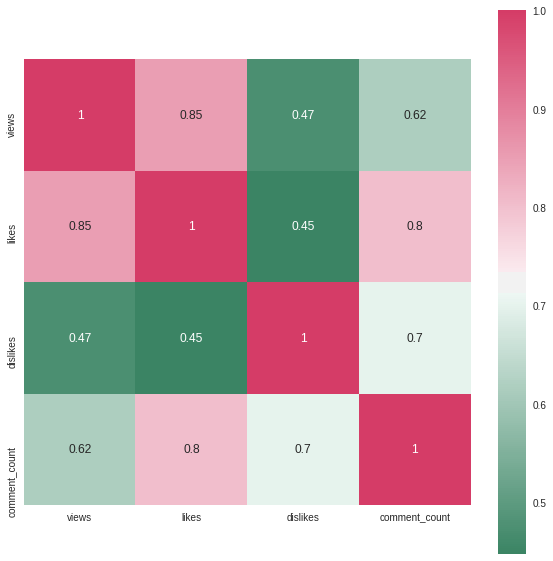

In [162]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(10, 10))
corr = df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(150, 1, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

In [163]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

In [164]:
# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

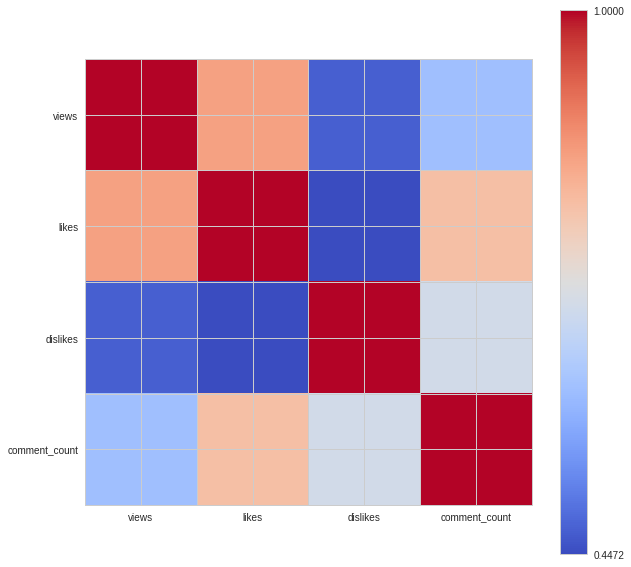

In [165]:
# making the labels
labels = ['']
for column in cor_col:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

In [166]:
# category analysis of USA

count_cat = df['category'].value_counts()

In [167]:
count_cat

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
Name: category, dtype: int64

In [193]:
#join countries dataset
dfs = list()
for csv in files:
    df = pd.read_csv(csv, index_col='video_id')
    df['country'] = csv[31:33]
    dfs.append(df)

my_df = pd.concat(dfs)
my_df.head(2)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,DE
Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,DE


In [169]:


my_df['trending_date'] = pd.to_datetime(my_df['trending_date'],errors='coerce', format='%y.%d.%m')
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

my_df = my_df[my_df['trending_date'].notnull()]
my_df = my_df[my_df['publish_time'].notnull()]

my_df = my_df.dropna(how='any',inplace=False, axis = 0)

my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time

my_df_full = my_df.reset_index().sort_values('trending_date').set_index('video_id')
my_df = my_df.reset_index().sort_values('trending_date').drop_duplicates('video_id',keep='last').set_index('video_id')
my_df[['publish_date','publish_time']].head()



,publish_date,publish_time
video_id,,
wRGldR_SQAA,2017-11-09,18:01:04
agKDPntMv-E,2017-11-08,15:59:06
Xl38SuxyrgM,2017-11-09,07:27:32
u7pV4vxD1bs,2017-11-08,20:16:47
zYWt2mnalP8,2017-11-08,00:03:47


In [170]:
my_df['category_id'] = my_df['category_id'].astype(str)
my_df_full['category_id'] = my_df['category_id'].astype(str)

category_id = {}

with open('/home/hduser/Downloads/US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']

my_df.insert(4, 'category', my_df['category_id'].map(category_id))
my_df_full.insert(4, 'category', my_df_full['category_id'].map(category_id))
category_list = my_df['category'].unique()
category_list

array([u'People & Blogs', u'Sports', u'News & Politics', u'Entertainment',
       u'Music', u'Comedy', u'Autos & Vehicles', u'Film & Animation',
       u'Science & Technology', u'Education', u'Howto & Style', u'Gaming',
       u'Pets & Animals', u'Travel & Events', u'Shows',
       u'Nonprofits & Activism', u'Trailers', u'Movies'], dtype=object)

In [171]:
fre_df = pd.DataFrame(my_df_full.groupby([my_df_full.index,'country']).count()['title'].sort_values(ascending=False)).reset_index()
fre_df.head(), fre_df.tail()

(      video_id country  title
 0  2z3EUY1aXdY      GB     38
 1  BhIEIO0vaBE      GB     38
 2  NooW_RbfdWI      GB     38
 3  u_C4onVrr8U      GB     38
 4  Il-an3K9pjg      GB     38,           video_id country  title
 89376  _lm9AoOQ9vQ      DE      1
 89377  _lhibYD39Gs      CA      1
 89378  _lg8sNpeOUM      CA      1
 89379  _ldNAKG0eJ4      CA      1
 89380  --2K8l6BWfw      FR      1)

In [172]:
corr_matrix =my_df[cor_col].corr()

In [173]:
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.787555,0.463310,0.488671
likes,0.787555,1.000000,0.509924,0.782222
dislikes,0.463310,0.509924,1.000000,0.611595
comment_count,0.488671,0.782222,0.611595,1.000000


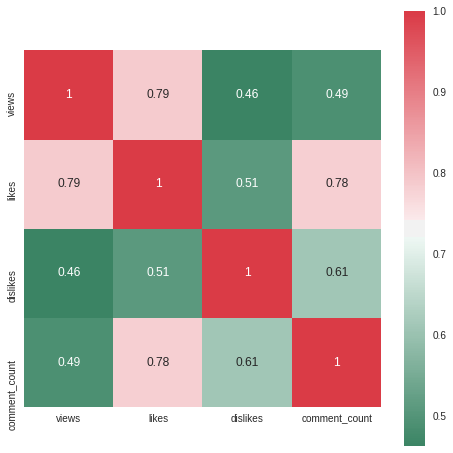

In [174]:
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = my_df[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(150, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

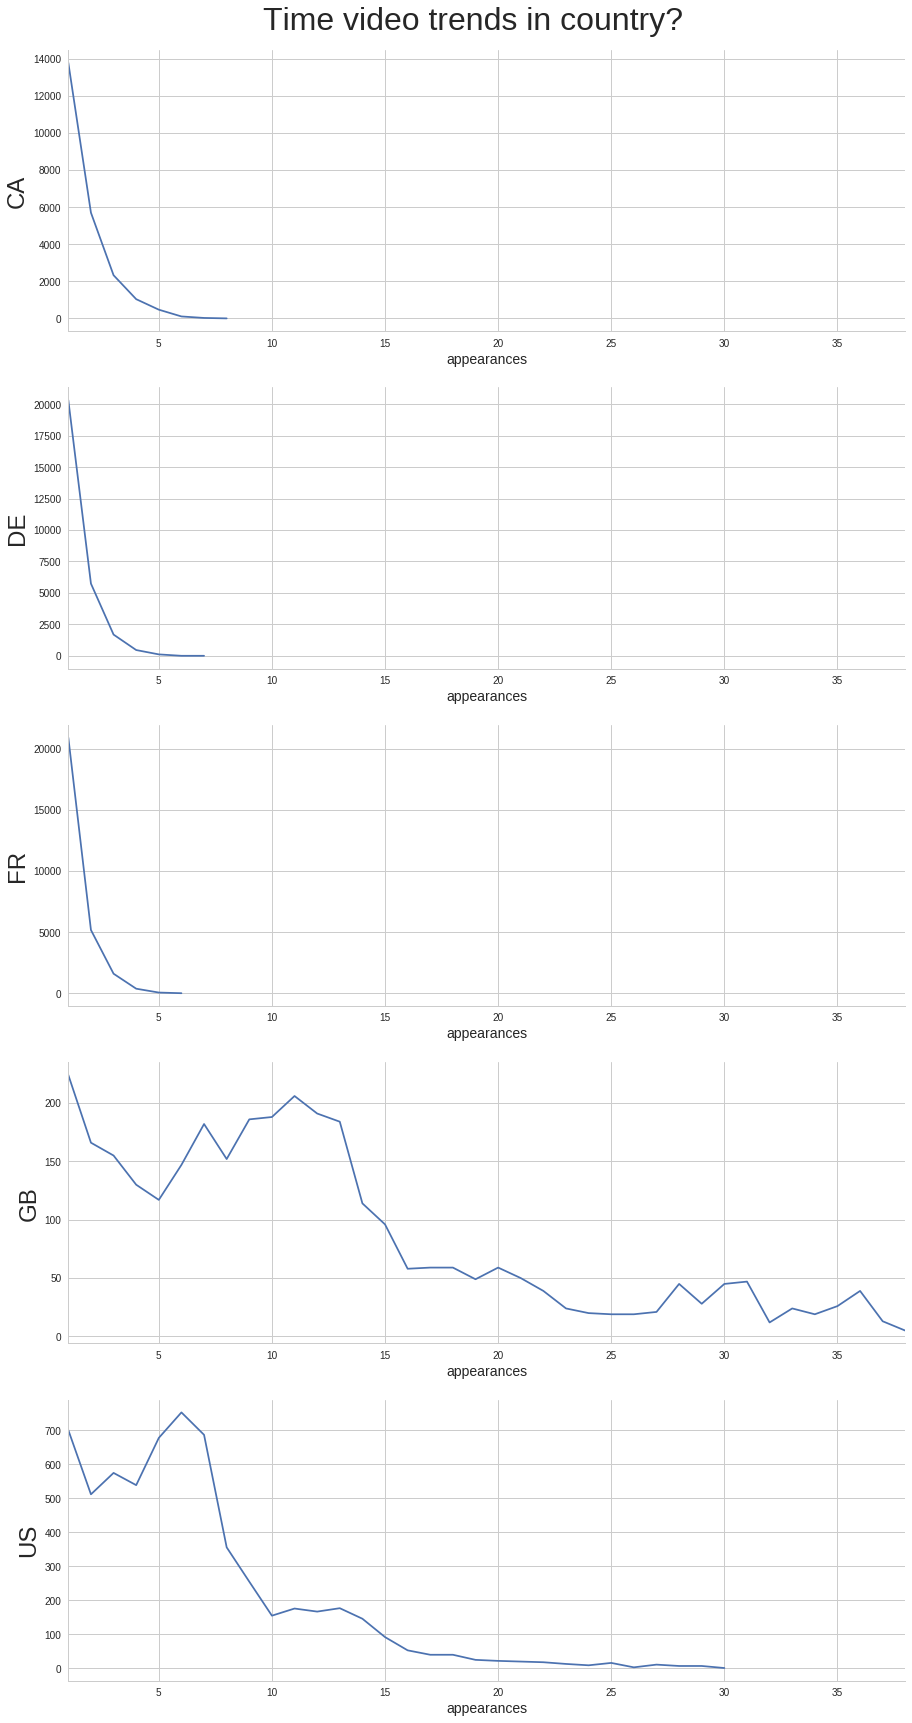

In [175]:
video_list,max_list = list(),list()
country_list = my_df.groupby(['country']).count().index

for c in country_list:
    video_list.append(fre_df[fre_df['country']==c]['title'].value_counts().sort_index())
    max_list.append(max(fre_df[fre_df['country']==c]['title'].value_counts().sort_index().index))

fig, [ax0, ax1, ax2, ax3, ax4] = plt.subplots(nrows=5,figsize=(15, 30))
st = fig.suptitle("Time video trends in country?", fontsize=32)
st.set_y(0.9)
for i, pt in enumerate([ax0, ax1, ax2, ax3, ax4]):
    pt.plot(video_list[i].index, video_list[i])
    pt.spines['right'].set_visible(False)
    pt.spines['top'].set_visible(False)
    pt.set_xlabel("appearances",fontsize=14)
    pt.set_ylabel(country_list[i],fontsize=24)
    pt.axes.set_xlim(1, max(max_list))


plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)

plt.show()

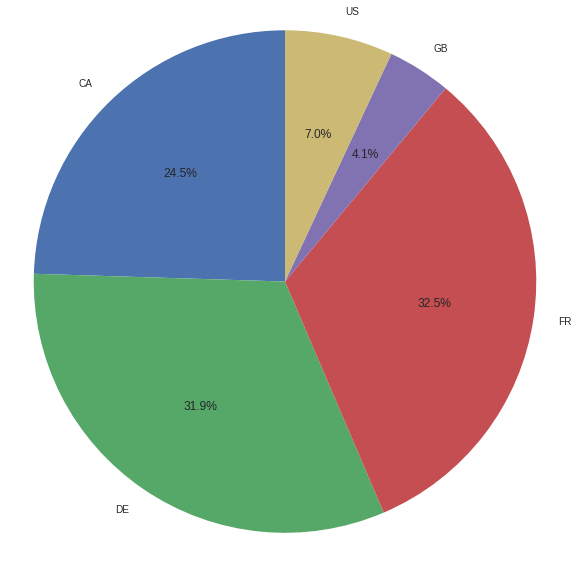

In [176]:
labels = my_df.groupby(['country']).count().index
sizes = my_df.groupby(['country']).count()['title']


fig, ax = plt.subplots(figsize=(10,10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  
sizes
plt.show()

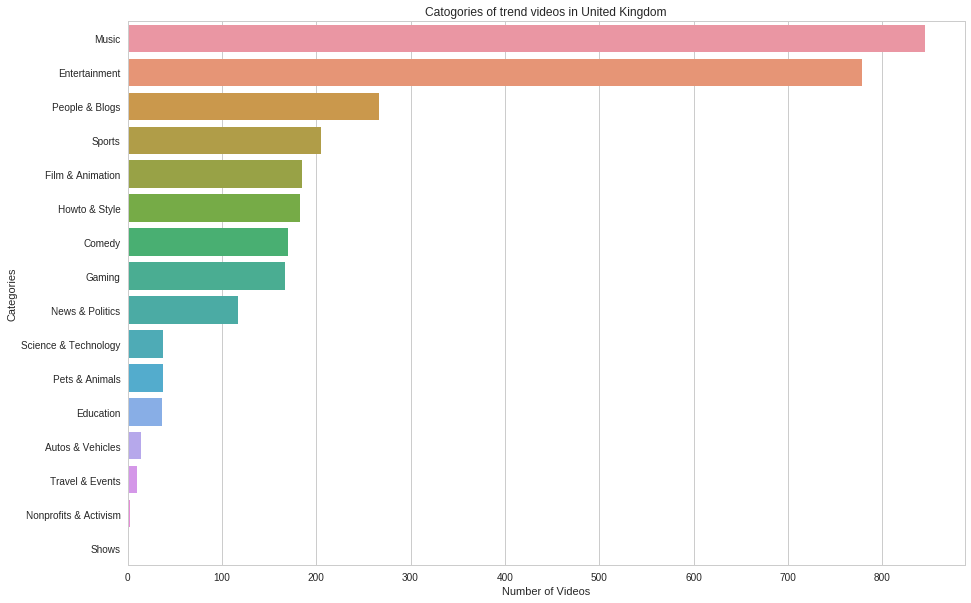

In [177]:
cat_df_gb = my_df[my_df['country']=='GB']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_gb['index'],x=cat_df_gb['category'], data=cat_df_gb,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in United Kingdom")
plt.show(1)

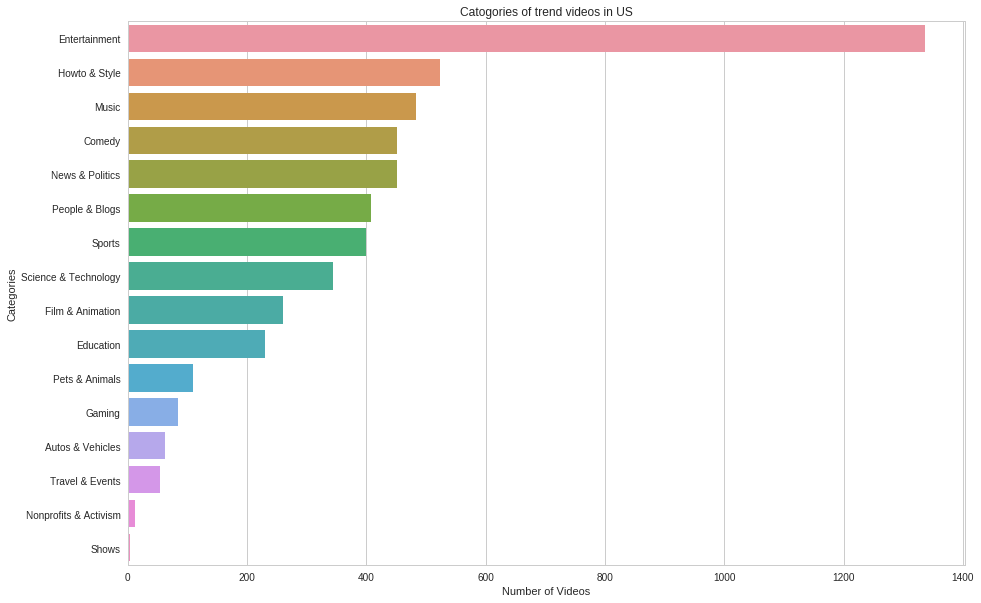

In [178]:
cat_df_us = my_df[my_df['country']=='US']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_us['index'],x=cat_df_us['category'], data=cat_df_us,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in US")
plt.show(1)

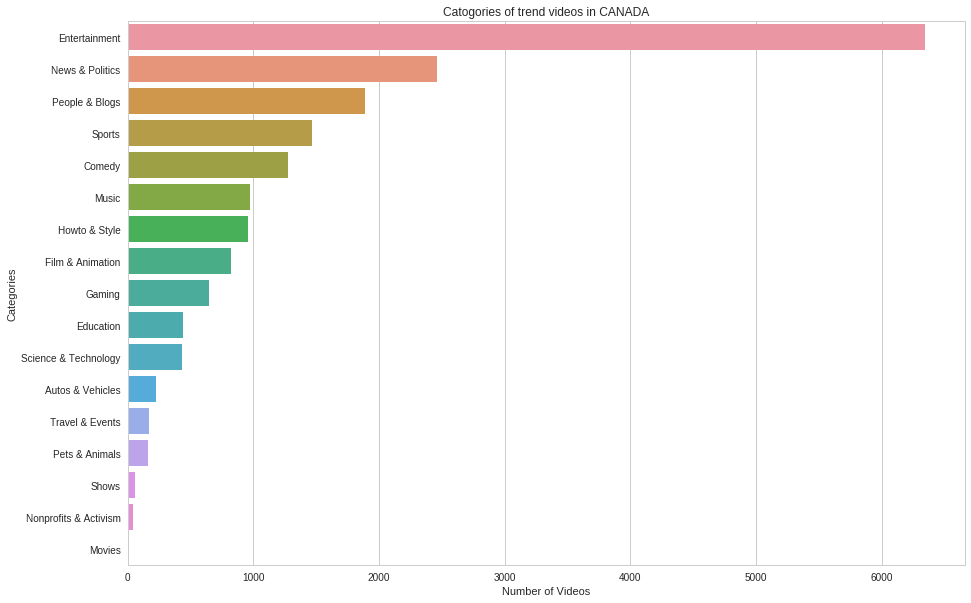

In [179]:
cat_df_ca = my_df[my_df['country']=='CA']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_ca['index'],x=cat_df_ca['category'], data=cat_df_ca,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in CANADA")
plt.show(1)

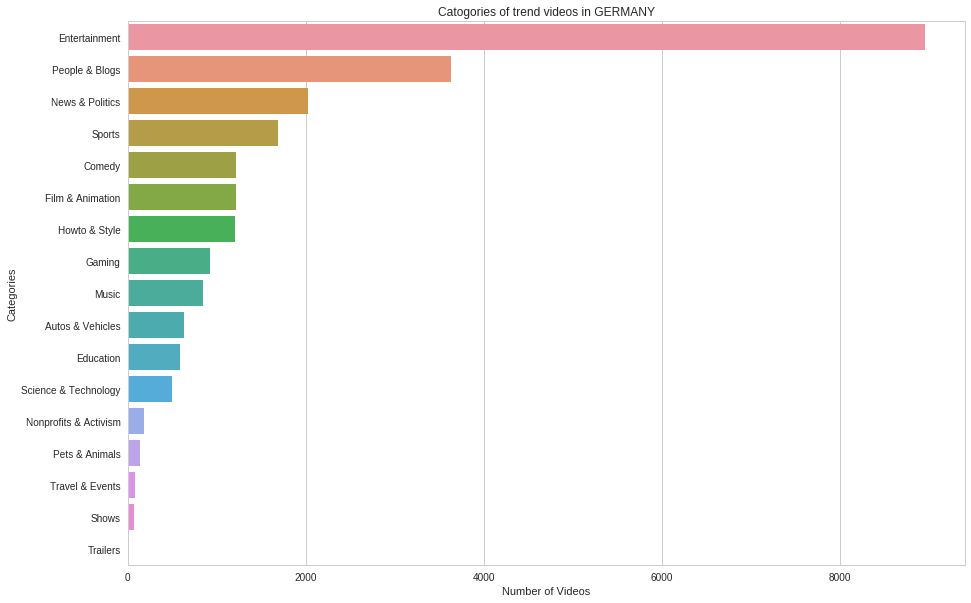

In [180]:
cat_df_de = my_df[my_df['country']=='DE']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_de['index'],x=cat_df_de['category'], data=cat_df_de,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in GERMANY")
plt.show(1)

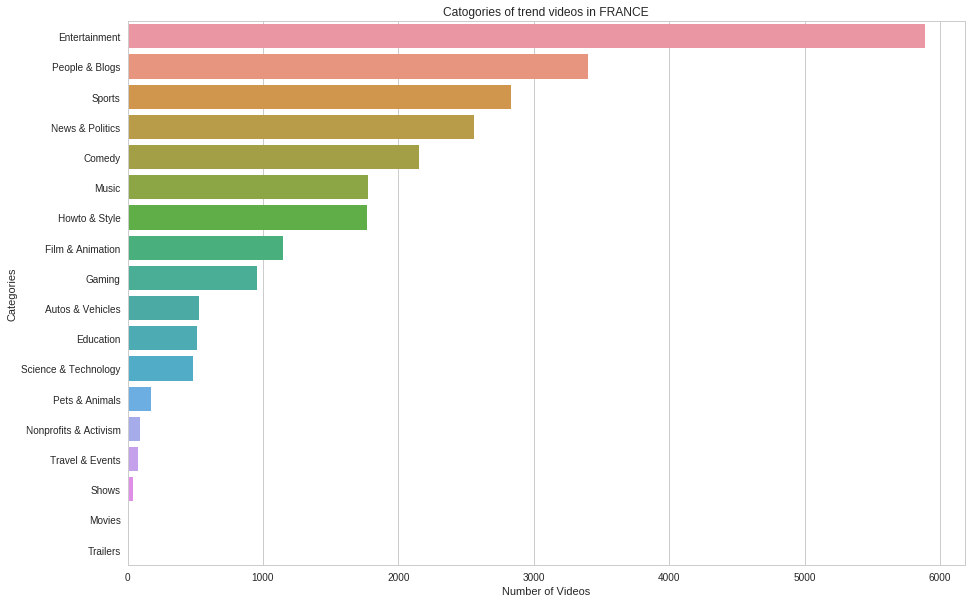

In [181]:
cat_df_fr = my_df[my_df['country']=='FR']['category'].value_counts().reset_index()
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=cat_df_fr['index'],x=cat_df_fr['category'], data=cat_df_fr,orient='h')
plt.xlabel("Number of Videos")
plt.ylabel("Categories")
plt.title("Catogories of trend videos in FRANCE")
plt.show(1)

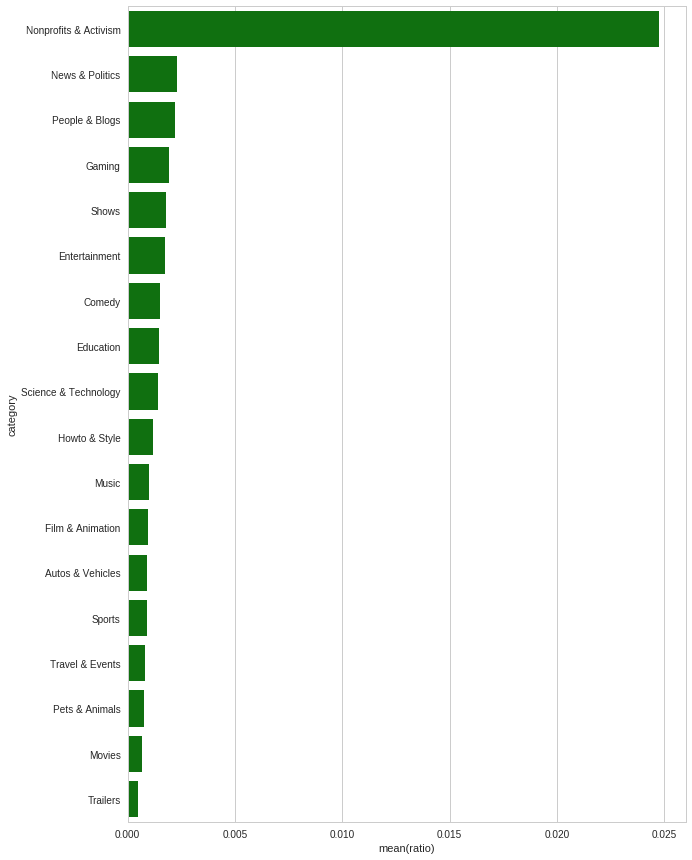

In [192]:
view_dislike_ratio = my_df.groupby('category')['dislikes'].agg('sum') / my_df.groupby('category')['views'].agg('sum')
view_dislike_ratio = view_dislike_ratio.sort_values(ascending=False).reset_index()
view_dislike_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_dislike_ratio,
            label="Views-Dislikes Ratio", color="g")
plt.show(1)

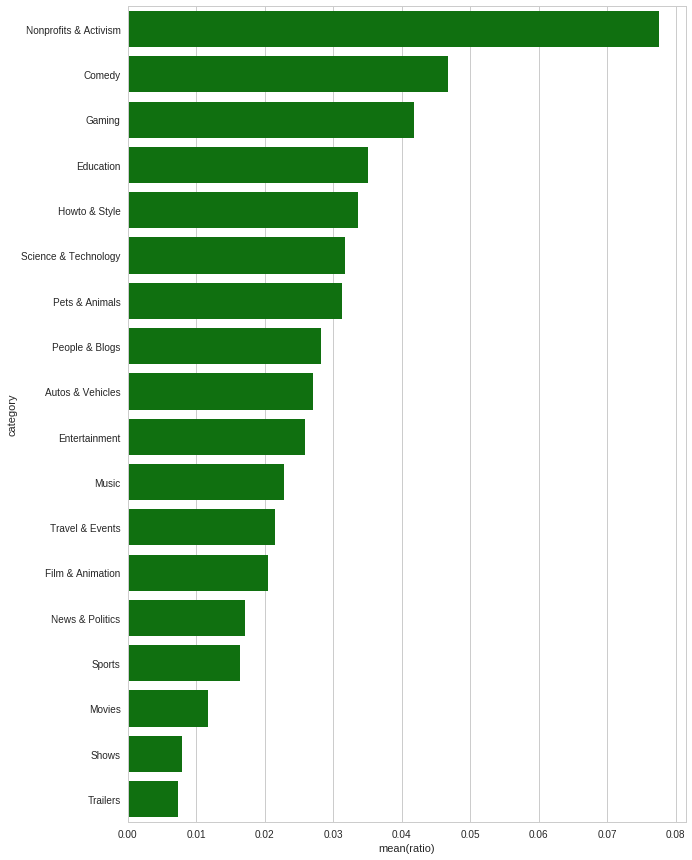

In [183]:
view_like_ratio = my_df.groupby('category')['likes'].agg('sum') / my_df.groupby('category')['views'].agg('sum')
view_like_ratio = view_like_ratio.sort_values(ascending=False).reset_index()
view_like_ratio.columns = ['category','ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x="ratio", y="category", data=view_like_ratio,
            label="Views-Likes Ratio", color="g")
plt.show(1)